# Procedural generating of cave cells

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cave

%matplotlib inline

%load_ext autoreload
%autoreload 2

# Mask Creation

In [ ]:
def get_cirle_mask(N, ratio1, ratio2):
    mask = np.ones([N, N], dtype=bool)
    for i in range(N):
        for j in range(N):
            if circle_mask(i+1, j+1, N/2, N/2, (N/ratio1)**2) and \
               not circle_mask(i+1, j+1, N/2, N/2, (N/ratio2)**2):

                mask[i, j] = False
            else:
                mask[i, j] = True
    return mask


def get_elipse_mask(N, ratio1, ratio2):
    mask = np.ones([N, N], dtype=bool)
    for i in range(N):
        for j in range(N):
            if elipse_mask(i+1, j+1, N/2, N/2, (N/ratio1)**2) and \
                not circle_mask(i+1, j+1, N/2, N/2, (N/ratio2)**2):

                mask[i, j] = False
            else:
                mask[i, j] = True
    return mask


def get_sqrt_mask(N, ratio1, ratio2):
    mask = np.ones([N, N], dtype=bool)
    for i in range(N):
        for j in range(N):
            if sqrt_mask(i+1, j+1, N/2, N/2, N/ratio1) and \
               not circle_mask(i+1, j+1, N/2, N/2, (N/ratio2)**2):
                mask[i, j] = False
            else:
                mask[i, j] = True
    return mask


def sqrt_mask(x, y, cen_x, cen_y, radius):
    return abs(x - cen_x) < radius and abs(y - cen_y) < radius


def circle_mask(x, y, cen_x, cen_y, radius):
    return ((x - cen_x)**2 + (y - cen_y)**2) < radius


def elipse_mask(x, y, cen_x, cen_y, radius):
    return (2*(x - cen_x)**2 + (y - cen_y)**2) < radius


# ALL PARAMS

In [ ]:
size = 400
out = 2.1
inner = 7

mask = get_cirle_mask(size, out, inner)
# mask = get_sqrt_mask(size, out, inner)
#mask = get_elipse_mask(size, out, inner)

param = {
    # cave generation
    'size': size,  # 400
    'prob': 0.515,  # 0.51
    'steps': 100,  # 100
    # 'death': [(0, 0), (5, 10), (4, 12), (5, 15), (4, 18), (5, 21), (4, 25), (3, 30)],
    # 'birth': [        (5, 0),  (3, 12), (5, 15), (3, 18), (5, 21), (3, 25), (5, 30)],
    # 'death': [(0, 0), (4, 20), (5, 50), (4, 54), (5, 65), (4, 69)],
    # 'birth': [(5, 0), (3, 40), (5, 50), (3, 55), (5, 65), (4, 70)],
    'death': [(0, 0), (4, 20), (5, 50), (4, 60)],
    'birth': [(5, 0), (4, 40), (5, 55), (4, 90)],

    # path generation
    'min_len': 3000,  # 200
    'max_steps': 10000,  # 15000
    'max_jump': 20,  # 20

    # smoothing path
    'smooth_coef': [30, 50, 70, 90, 110],
    # [10, 20, 30, 40, 50,
    #                10, 30, 50, 70, 90,
    #                10, 40, 70, 100, 130,
    #                10, 50, 80, 110, 150],
    # [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    # [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
    #[2, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    #[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    #[1, 10, 30, 50, 70, 90]

    # visual params
    'beg': 5,  # 5
    'delta': 0.005,  # 0.005
    'smooth_width': 1,  # 1
    'smooth_color': 'black',  # 'black'
    'point_size': 10,  # 6
    'interval': 500,  # 100
    #'debug': False
}

In [ ]:
map = cave.Cave(mask, **param)

In [ ]:
map.show()

In [ ]:
map.show_path()

In [ ]:
#test = Cave(mask, inner_mask_draw, outer_mask_draw,**param, debug = True)
#ani = test.animation()
#plt.show()
#test.show_map()

In [ ]:
#np.save('caves/cave5.npy', cave.map)

In [ ]:
#cave = np.load('caves/cave1.npy')
#caves = [cave]

# Generate a lot of pics!

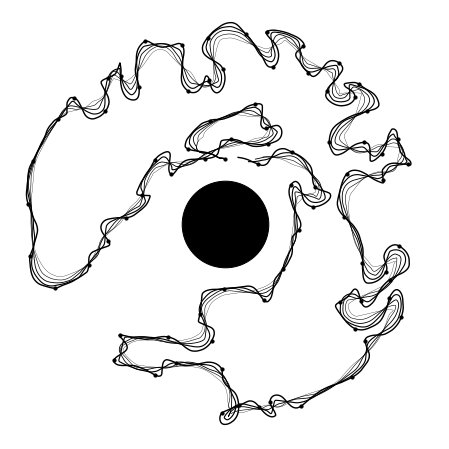

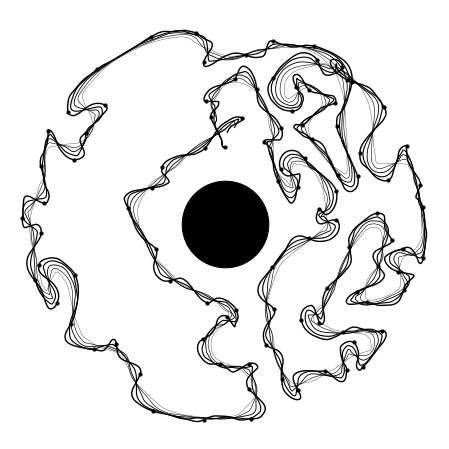

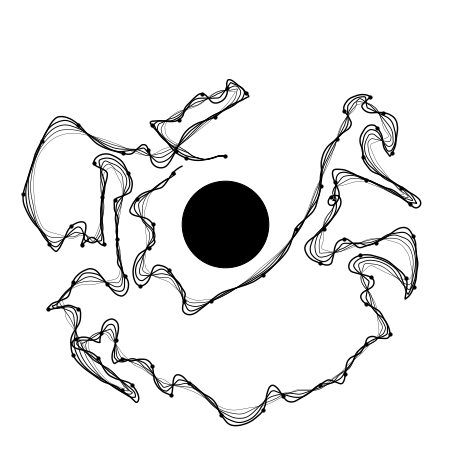

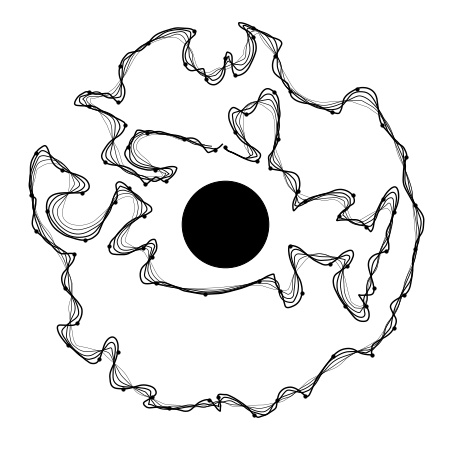

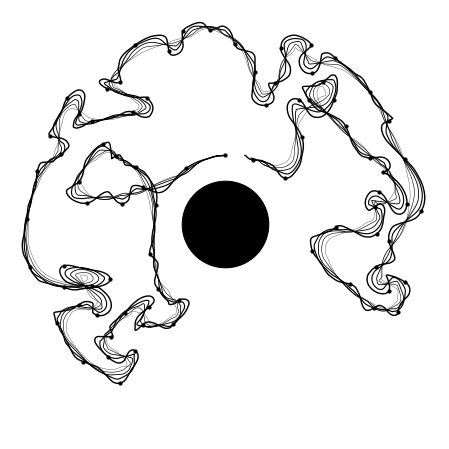

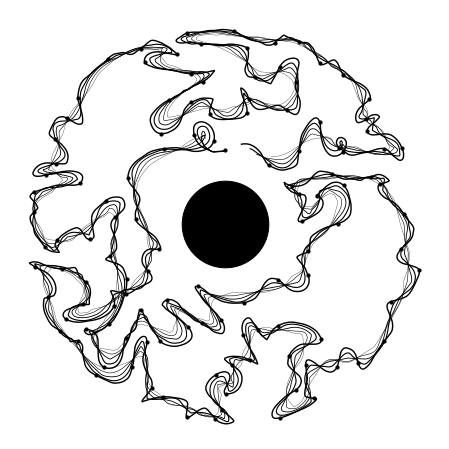

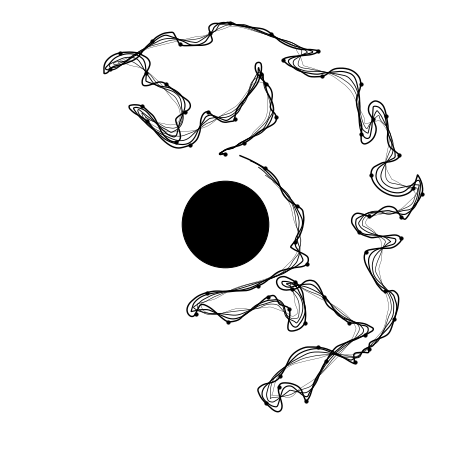

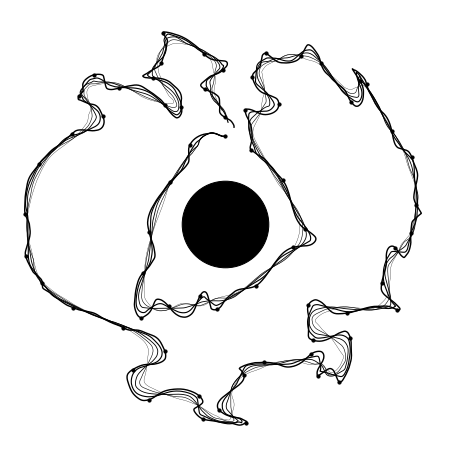

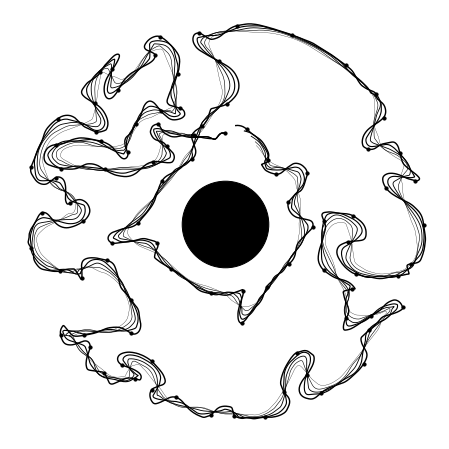

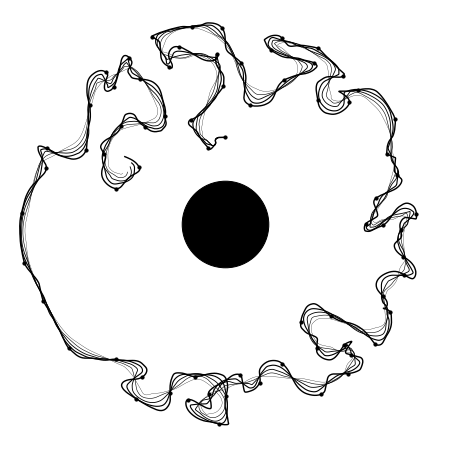

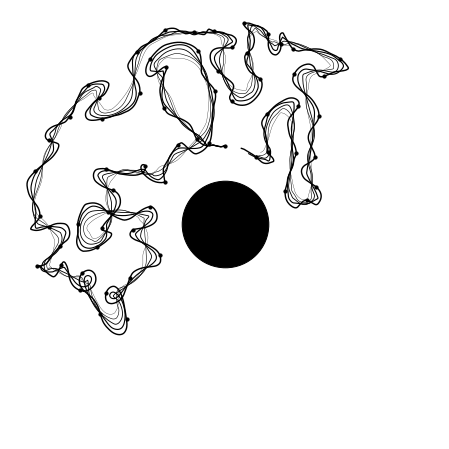

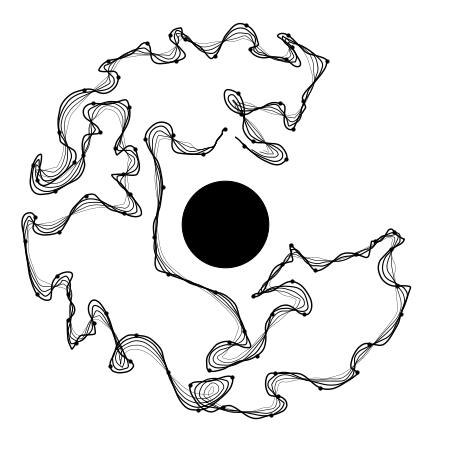

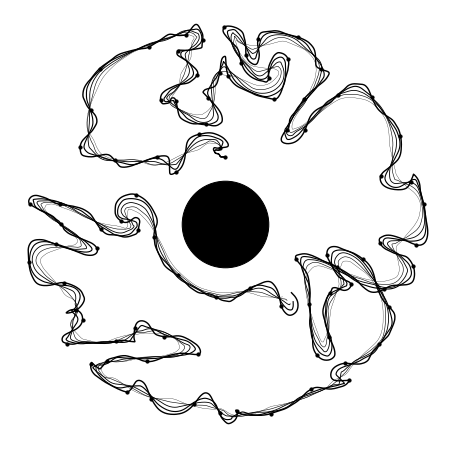

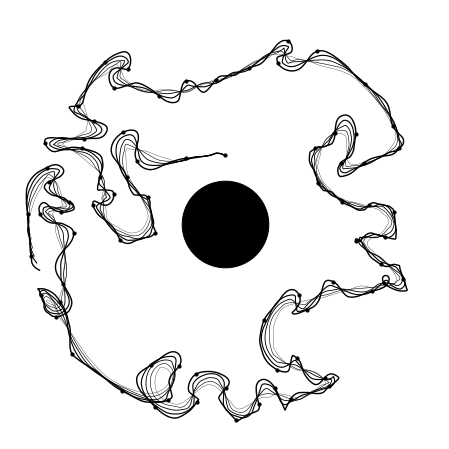

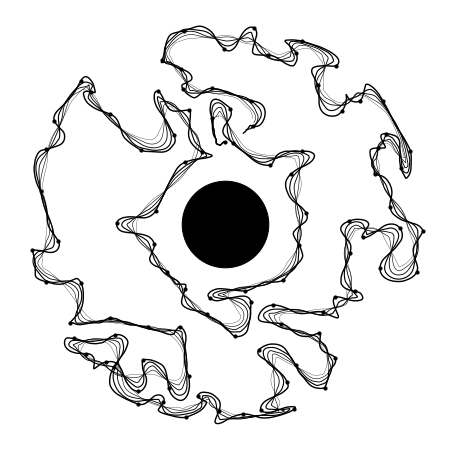

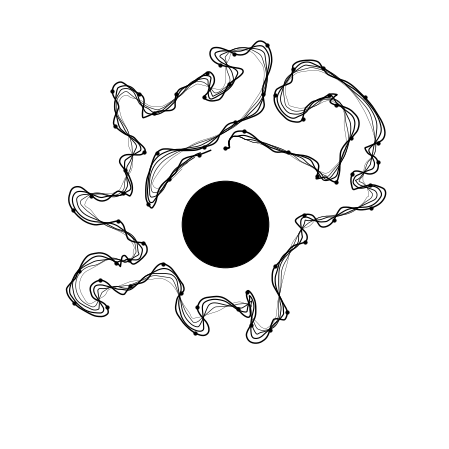

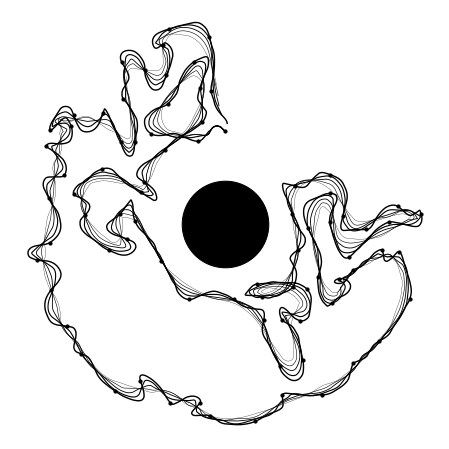

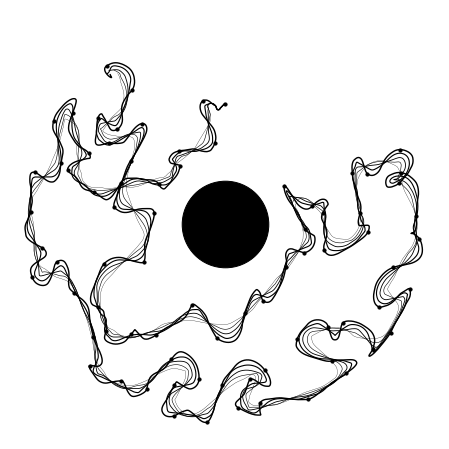

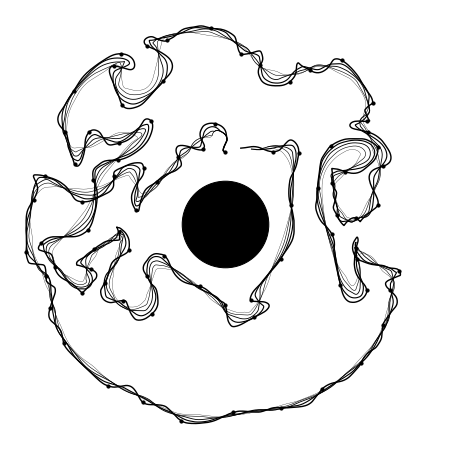

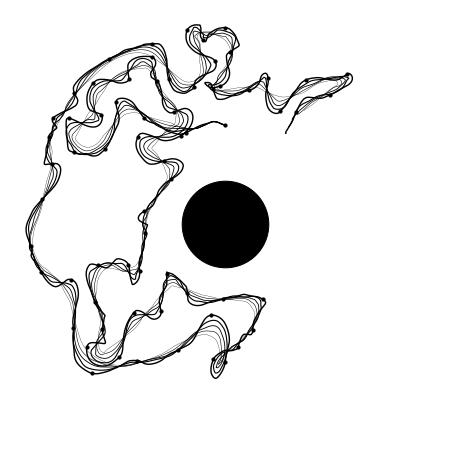

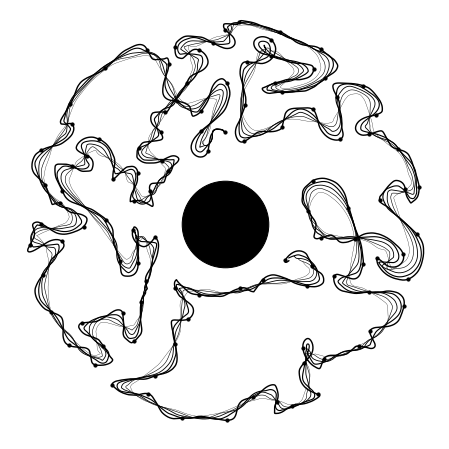

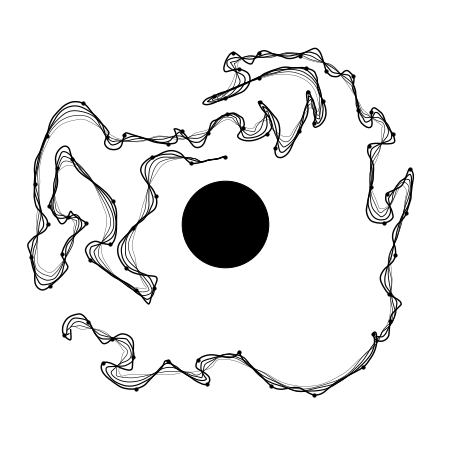

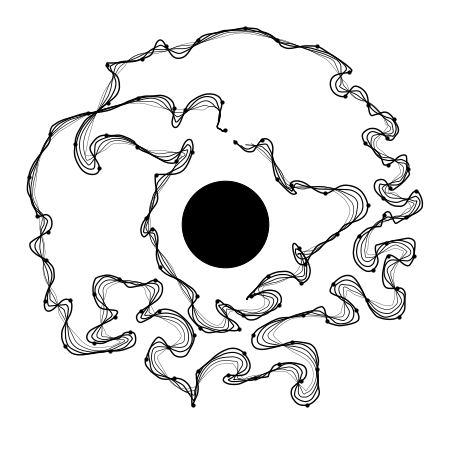

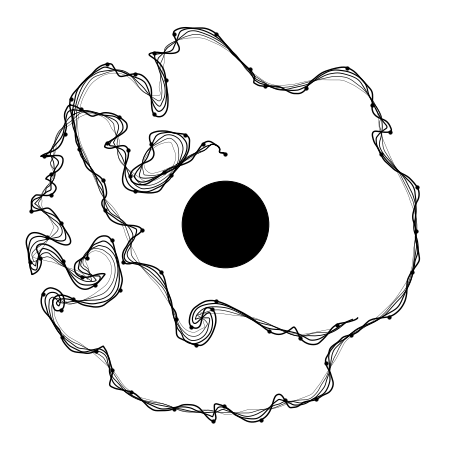

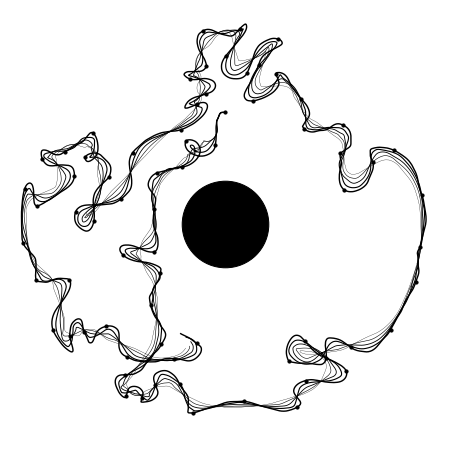

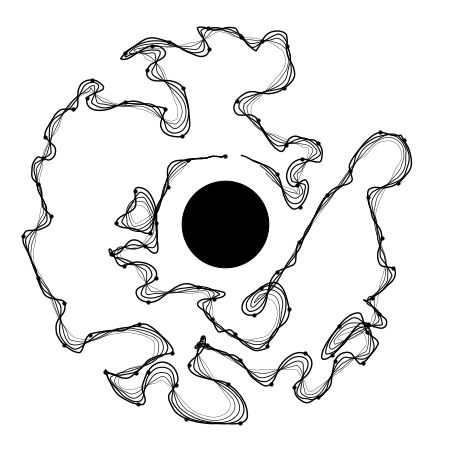

In [8]:
for _ in range(411):
    map = cave.Cave(mask, **param)
    map.show()